In [205]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

df = pd.read_csv('AviationDataCleaned.csv',index_col=0)

%matplotlib inline

In [52]:
df.head()

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Make and Model,Total_passengers,Fatality_Pecentage,Serious_Inj_Percentage,Minor/NonInj_Percentage
0.0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,0.0,UNK,Cruise,Probable Cause,1948.0,Stinson-108-3,2.0,100.000000,0.000000,0.0
1.0,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,0.0,UNK,Unknown,Probable Cause,1962.0,Piper-Pa24-180,4.0,100.000000,0.000000,0.0
2.0,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,0.0,IMC,Cruise,Probable Cause,1974.0,Cessna-172M,3.0,100.000000,0.000000,0.0
3.0,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,0.0,IMC,Cruise,Probable Cause,1977.0,Rockwell-112,2.0,100.000000,0.000000,0.0
4.0,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,...,0.0,VMC,Approach,Probable Cause,1979.0,Cessna-501,3.0,33.333333,66.666667,0.0


In [33]:
"""
Creating a subset of the DF that has only US accidents
"""
df_us = df[df['Country'] == 'United States']
df_us.reset_index(drop=True, inplace=True)

df_us = df_us.copy()

df_us

,Investigation.Type,Event.Date,Location,Country,Injury.Severity,Aircraft.damage,Aircraft.Category,Make,Model,Amateur.Built,...,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Year,Make and Model,Total_passengers,Fatality_Pecentage,Serious_Inj_Percentage,Minor/NonInj_Percentage
0,Accident,1948-10-24,"MOOSE CREEK, ID",United States,Fatal(2),Destroyed,NaN,Stinson,108-3,No,...,0.0,UNK,Cruise,Probable Cause,1948.0,Stinson-108-3,2.0,100.000000,0.000000,0.0
1,Accident,1962-07-19,"BRIDGEPORT, CA",United States,Fatal(4),Destroyed,NaN,Piper,PA24-180,No,...,0.0,UNK,Unknown,Probable Cause,1962.0,Piper-PA24-180,4.0,100.000000,0.000000,0.0
2,Accident,1974-08-30,"Saltville, VA",United States,Fatal(3),Destroyed,NaN,Cessna,172M,No,...,0.0,IMC,Cruise,Probable Cause,1974.0,Cessna-172M,3.0,100.000000,0.000000,0.0
3,Accident,1977-06-19,"EUREKA, CA",United States,Fatal(2),Destroyed,NaN,Rockwell,112,No,...,0.0,IMC,Cruise,Probable Cause,1977.0,Rockwell-112,2.0,100.000000,0.000000,0.0
4,Accident,1979-08-02,"Canton, OH",United States,Fatal(1),Destroyed,NaN,Cessna,501,No,...,0.0,VMC,Approach,Probable Cause,1979.0,Cessna-501,3.0,33.333333,66.666667,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
73760,Accident,2022-12-21,"Auburn Hills, MI",United States,Minor,NaN,NaN,CESSNA,172F,No,...,0.0,NaN,NaN,NaN,2022.0,CESSNA-172F,1.0,0.000000,100.000000,0.0
73761,Accident,2022-12-21,"Reserve, LA",United States,Minor,NaN,NaN,GRUMMAN AMERICAN AVN. CORP.,AA-5B,No,...,1.0,NaN,NaN,NaN,2022.0,GRUMMAN AMERICAN AVN. CORP.-AA-5B,2.0,0.000000,50.000000,50.0
73762,Accident,2022-12-26,"Annapolis, MD",United States,Minor,NaN,NaN,PIPER,PA-28-151,No,...,0.0,NaN,NaN,NaN,2022.0,PIPER-PA-28-151,1.0,0.000000,100.000000,0.0
73763,Accident,2022-12-26,"Payson, AZ",United States,Non-Fatal,Substantial,Airplane,AMERICAN CHAMPION AIRCRAFT,8GCBC,No,...,1.0,VMC,NaN,NaN,2022.0,AMERICAN CHAMPION AIRCRAFT-8GCBC,1.0,0.000000,0.000000,100.0


In [53]:
"""
Create City and State columns based on the Location column -- 

First we need a list of valid state codes to verify that the location has a valid US state (plus PR)

"""
states = [
    'AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 
    'HI', 'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 
    'MA', 'MI', 'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 
    'NM', 'NY', 'NC', 'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 
    'SD', 'TN', 'TX', 'UT', 'VT', 'VA', 'WA', 'WV', 'WI', 'WY'
]

state_region_map = {
    'ME': 'Northeast', 'NH': 'Northeast', 'VT': 'Northeast', 'MA': 'Northeast',
    'RI': 'Northeast', 'CT': 'Northeast', 'NY': 'Northeast', 'PA': 'Northeast', 'NJ': 'Northeast',
    'WI': 'Midwest', 'MI': 'Midwest', 'IL': 'Midwest', 'IN': 'Midwest', 'OH': 'Midwest',
    'ND': 'Midwest', 'SD': 'Midwest', 'NE': 'Midwest', 'KS': 'Midwest', 'MN': 'Midwest', 'IA': 'Midwest', 'MO': 'Midwest',
    'DE': 'South', 'MD': 'South', 'DC': 'South', 'VA': 'South', 'WV': 'South', 'NC': 'South', 'SC': 'South', 
    'GA': 'South', 'FL': 'South', 'KY': 'South', 'TN': 'South', 'MS': 'South', 'AL': 'South', 'OK': 'South', 
    'TX': 'South', 'AR': 'South', 'LA': 'South',
    'ID': 'West', 'MT': 'West', 'WY': 'West', 'NV': 'West', 'UT': 'West', 'CO': 'West', 'AZ': 'West', 
    'NM': 'West', 'AK': 'West', 'WA': 'West', 'OR': 'West', 'CA': 'West', 'HI': 'West'
}

def city_state(location):
    if pd.notna(location):
        location = location.strip()
        state = location[-2:].upper()
        city = location[:-4].strip().title()
        if state in states:
            return city, state
        else:
            return location, "No State"
    else:
        return np.nan, np.nan

df_us[['City', 'State']] = df_us['Location'].apply(city_state).apply(pd.Series)

df_us['Region'] = df_us['State'].apply(lambda x: state_region_map.get(x))

/var/folders/_x/3hvhfs550_j07qx5c00fkgnc0000gn/T/ipykernel_44997/1856336550.py:43: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us[['City', 'State']] = df_us['Location'].apply(city_state).apply(pd.Series)
/var/folders/_x/3hvhfs550_j07qx5c00fkgnc0000gn/T/ipykernel_44997/1856336550.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_us['Region'] = df_us['State'].apply(lambda x: state_region_map.get(x))


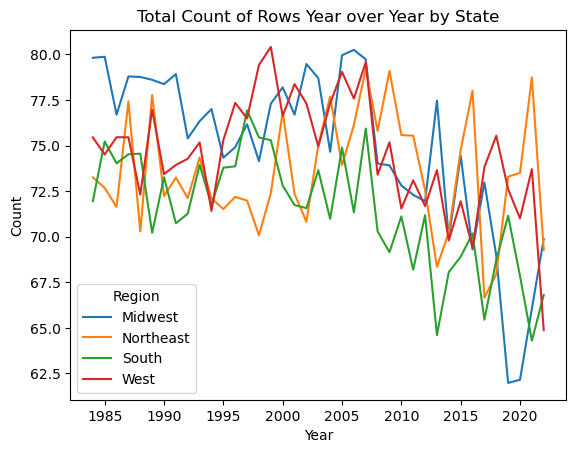

In [78]:
df_us = df_us[(df_us['State'] != 'No State') & (df_us['Year']>=1984)]

grouped_data = df_us.groupby(['Year', 'Region'])['Minor/NonInj_Percentage'].mean().reset_index(name='Count')

pivot_data = grouped_data.pivot(index='Year', columns='Region', values='Count')

# accidents_by_year
pivot_data.plot(kind='line')  # Use 'bar' for bar plot
plt.title('Total Count of Rows Year over Year by State')
plt.xlabel('Year')
plt.ylabel('Count')

plt.show()


In [80]:
# df_us.to_csv('US_Accidents.csv')

In [180]:
minor = df_us.groupby(['Region'])['Minor/NonInj_Percentage'].mean().to_frame()
major = df_us.groupby(['Region'])['Serious_Inj_Percentage'].mean().to_frame()
fatal = df_us.groupby(['Region'])['Fatality_Pecentage'].mean().to_frame()
totals = df_us.groupby(['Region']).size()

KeyError: 'Column not found: Fatality_Percentage'

In [190]:
col_selector = ['Region', 'Minor/NonInj_Percentage', 'Serious_Inj_Percentage', 'Fatality_Pecentage']
total_new = df_us[col_selector].groupby('Region').mean()
# total_new['Total'] = totals

total_new

,Minor/NonInj_Percentage,Serious_Inj_Percentage,Fatality_Pecentage
Region,,,
Midwest,76.139920,9.503308,14.356771
Northeast,73.557268,10.719658,15.723074
South,72.065642,11.245025,16.689332
West,75.043376,9.517506,15.439118


<BarContainer object of 4 artists>

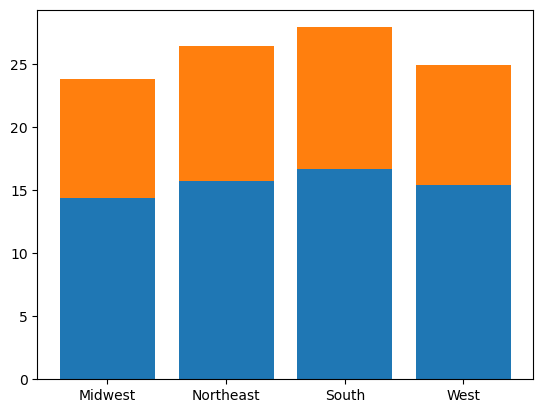

In [191]:
plt.bar(total_new.index, total_new['Fatality_Pecentage'])

plt.bar(total_new.index, total_new['Serious_Inj_Percentage'], label='Serious Injury Percentage', bottom=total_new['Fatality_Pecentage'])


In [184]:
melted_df = total_new.melt(var_name='Category', value_name='Value')

melted_df

,Category,Value
0,Minor/NonInj_Percentage,76.139920
1,Minor/NonInj_Percentage,73.557268
2,Minor/NonInj_Percentage,72.065642
3,Minor/NonInj_Percentage,75.043376
4,Serious_Inj_Percentage,9.503308
5,Serious_Inj_Percentage,10.719658
6,Serious_Inj_Percentage,11.245025
7,Serious_Inj_Percentage,9.517506
8,Fatality_Pecentage,14.356771
9,Fatality_Pecentage,15.723074


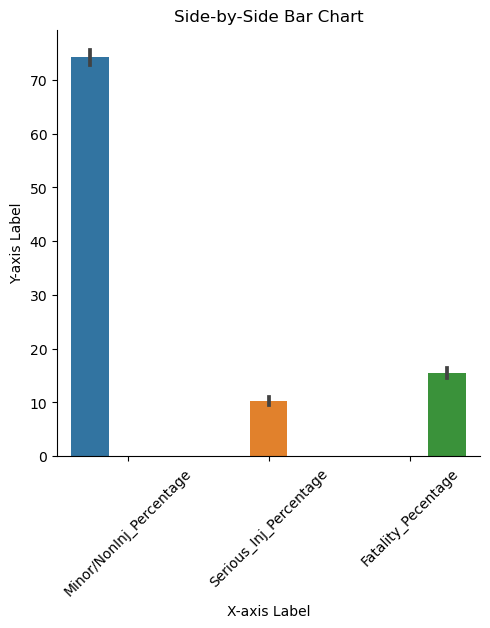

In [218]:
melted_df = total_new.melt(var_name='Category', value_name='Value')

# Create a bar plot with catplot
sns.catplot(x='Category', y='Value', hue='Category', data=melted_df, kind='bar')

# Adding labels and title
plt.xlabel('X-axis Label')
plt.xticks(rotation=45)
plt.ylabel('Y-axis Label')
plt.title('Side-by-Side Bar Chart')

# Display the plot

plt.show()